<a href="https://www.kaggle.com/code/adityapunetha/autoencoder-colorize?scriptVersionId=101139934" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Dependencies

In [1]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from cv2 import cvtColor, COLOR_BGR2RGB, COLOR_LAB2RGB

%matplotlib inline

# Data

In [2]:
df_1 = np.load('../input/image-colorization/ab/ab/ab1.npy')
df_2 = np.load('../input/image-colorization/ab/ab/ab2.npy')
df_3 = np.load('../input/image-colorization/ab/ab/ab3.npy')
df_gray = np.load('../input/image-colorization/l/gray_scale.npy')

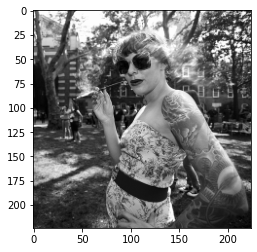

In [48]:
plt.imshow(df_gray[0],cmap = 'gray')

In [3]:
def show_lab_img(image):
    plt.imshow(cvtColor(image, COLOR_LAB2RGB))

In [6]:
sample = resize(df_1[0] ,(256,256))
sample.shape

(256, 256, 2)

In [62]:
result = np.zeros((256, 256, 3))

In [71]:
result[:,:,0] = sample[:,:,0]
result[:,:,1:] = resize(df_gray[0] ,(256,256,1))
result = result.astype('float32')

In [74]:
result = result * 255

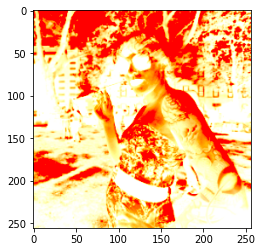

In [76]:
show_lab_img(result)

In [16]:
result = np.zeros((256, 256, 3))
result[:,:,0] = resize(df_gray[0] ,(256,256))
result[:,:,1:] = sample

In [18]:
result = result.astype('float32')

In [20]:
result = result * 255

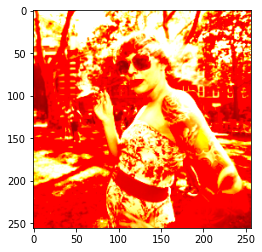

In [21]:
show_lab_img(result)

# Model

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [ ]:
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])

In [ ]:
model.summary()